Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT to DTFT Interpolation with the Periodic Sinc Function**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft
from scipy.special import diric

# Sampling of DTFT towards DFT 

We should create a signal and the corresponding DTFT spectrum for which we have analytical expressions.

We can use the exact Hamming window from the tutorial (see Ch. 1.8.4) found at https://github.com/spatialaudio/digital-signal-processing-exercises/blob/master/dft/dft_windowing_tutorial/dft_windowing_tutorial.pdf

In [2]:
N_DTFT = 2**3
beta = 21/25  # exact Hamming coeff, see
k_DTFT = np.arange(N_DTFT)
x_DTFT = 1 - beta * np.cos(2*np.pi/N_DTFT*(k_DTFT+1/2))
Omega_DTFT = np.arange(-4*np.pi, +4*np.pi, np.pi/2**6)
X_DTFT = np.exp(-1j*Omega_DTFT*(N_DTFT-1)/2)*(N_DTFT*diric(Omega_DTFT, N_DTFT) + beta/2 *
                                              N_DTFT*diric(Omega_DTFT-2*np.pi/N_DTFT, N_DTFT) + beta/2 *
                                              N_DTFT*diric(Omega_DTFT+2*np.pi/N_DTFT, N_DTFT))

We can zeropad the signal before the DFT. We do this manually, to make sure that we are aware of this concept.

In [3]:
# how many samples should be used for zeropadding of the x_DTFT signal
# if 0 then the signal has length of N_DTFT, so N_DTFT==N_DFT
Nzeropad = 5  

x_DFT = np.concatenate([x_DTFT, np.zeros(Nzeropad)])

Then we perform the DFT and calculate at which frequencies $\Omega_\mu$ the DFT coefficients occur:

In [4]:
# calculate the DFT of the zeropadded signal
N_DFT = x_DFT.size
#print('DFT size check must be zero:', N_DFT - N_DTFT - Nzeropad)
print('DFT block size:', N_DFT)
k_DFT = np.arange(N_DFT)
X_DFT = fft(x_DFT)
Omega_DFT = np.arange(N_DFT) * 2*np.pi/N_DFT

DFT block size: 13


By plotting the spectrum of the DTFT and the DFT, we see that the DFT coefficients exactly correspond to DTFT values at specific frequencies. This is due to the inherent sampling process, where we **sample the DTFT spectrum** to **precisely obtain the DFT coefficients**. Detailed derivation can be found in the [DFT tutorial in Ch. 1.7](https://github.com/spatialaudio/digital-signal-processing-exercises/blob/master/dft/dft_windowing_tutorial/dft_windowing_tutorial.pdf) 

**Sampling in one domain** (here the spectrum) corresponds to **'make it periodic' in the other domain** (here the discrete-time signal). The single window function that corresponds to the DTFT spectrum (blue) is thus repeated over and over again (orange), which is required for the DFT's periodicity characteristic. Its periodicity is determined by the DFT size and not necessarily equal to `N_DTFT`.

Very **large zeropadding** can be used to obtain many spectral samples and by that a very good **approximation of the DTFT** spectrum **without** using **explicit interpolation** between the DFT coefficients. This is often used in practice, very conveniently by calling `fft(x, N)` where `N` is larger than length of `x`. Note however, that by doing so, we do not increase the spectral resolution and we also do not enhance the capability for spectral discrimination. We gain **no new information by oversampling**.

Note that `N_DTFT=N_DFT` (no zeropadding) is the case of **critical sampling**.

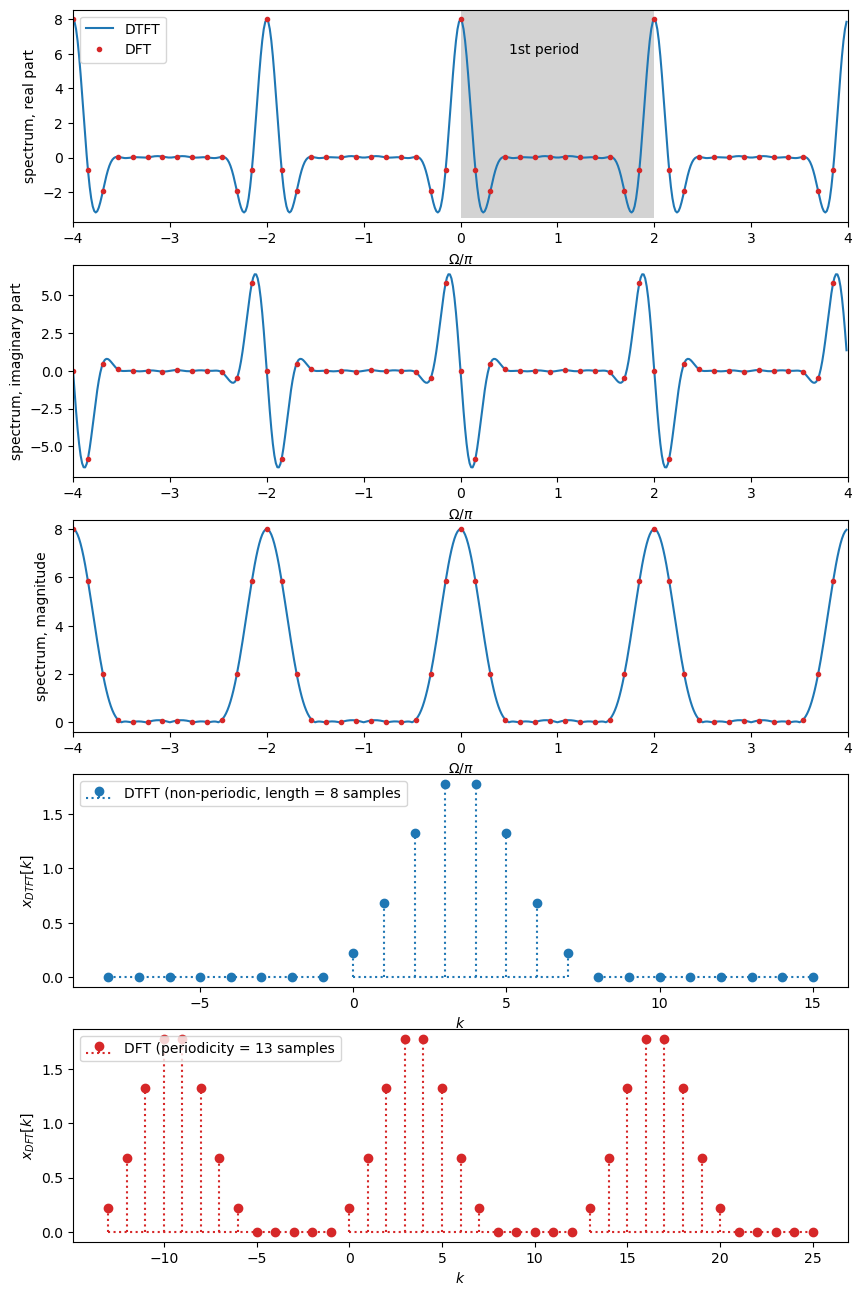

In [5]:
plt.figure(figsize=(10, 16))
ax = plt.subplot(5, 1, 1)
plt.plot(Omega_DTFT/np.pi, np.real(X_DTFT), label='DTFT')
plt.plot(Omega_DFT/np.pi, np.real(X_DFT), 'C3o', ms=3, label='DFT')
plt.plot((Omega_DFT-2*np.pi)/np.pi, np.real(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT-4*np.pi)/np.pi, np.real(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT+2*np.pi)/np.pi, np.real(X_DFT), 'C3o', ms=3)
plt.xlim(-4, 4)
plt.xlabel(r'$\Omega / \pi$')
plt.ylabel(r'spectrum, real part')
plt.legend(loc='upper left')
rect = plt.Rectangle((0, -3.5), 2, 12, facecolor='lightgrey')
ax.add_patch(rect)
plt.text(0.5, 6, '1st period')

plt.subplot(5, 1, 2)
ax = plt.plot(Omega_DTFT/np.pi, np.imag(X_DTFT))
plt.plot(Omega_DFT/np.pi, np.imag(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT-2*np.pi)/np.pi, np.imag(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT-4*np.pi)/np.pi, np.imag(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT+2*np.pi)/np.pi, np.imag(X_DFT), 'C3o', ms=3)
plt.xlim(-4, 4)
plt.xlabel(r'$\Omega / \pi$')
plt.ylabel(r'spectrum, imaginary part')

plt.subplot(5, 1, 3)
ax = plt.plot(Omega_DTFT/np.pi, np.abs(X_DTFT))
plt.plot(Omega_DFT/np.pi, np.abs(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT-2*np.pi)/np.pi, np.abs(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT-4*np.pi)/np.pi, np.abs(X_DFT), 'C3o', ms=3)
plt.plot((Omega_DFT+2*np.pi)/np.pi, np.abs(X_DFT), 'C3o', ms=3)
plt.xlim(-4, 4)
plt.xlabel(r'$\Omega / \pi$')
plt.ylabel(r'spectrum, magnitude')

plt.subplot(5, 1, 4)
plt.stem(k_DTFT, x_DTFT, basefmt='C0:', linefmt='C0:', markerfmt='C0o',
         label='DTFT (non-periodic, length = '+str(N_DTFT)+' samples')
plt.stem(k_DTFT-N_DTFT, x_DTFT*0, basefmt='C0:',
         linefmt='C0:', markerfmt='C0o')
plt.stem(k_DTFT+N_DTFT, x_DTFT*0, basefmt='C0:',
         linefmt='C0:', markerfmt='C0o')
plt.xlabel(r'$k$')
plt.ylabel(r'$x_{DTFT}[k]$')
plt.legend(loc='upper left')

plt.subplot(5, 1, 5)
plt.stem(k_DFT, x_DFT, basefmt='C3:', linefmt='C3:', markerfmt='C3o',
         label='DFT (periodicity = '+str(N_DFT)+' samples')
plt.stem(k_DFT-N_DFT, x_DFT, basefmt='C3:', linefmt='C3:', markerfmt='C3o')
plt.stem(k_DFT+N_DFT, x_DFT, basefmt='C3:', linefmt='C3:', markerfmt='C3o')
plt.xlabel(r'$k$')
plt.ylabel(r'$x_{DFT}[k]$')
plt.legend(loc='upper left');

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises